<a href="https://colab.research.google.com/github/Naman7Jindal/Blog-Application/blob/master/Big_Mart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import math

In [ ]:
#feature engineering
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

#train test split
from sklearn.model_selection import train_test_split

#ML models
from sklearn.linear_model import LinearRegression,SGDRegressor, Ridge, Lasso, ElasticNet

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS

#warning handle
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!gdown --id 1xFDvCOLa_gu34CosX8kSCIqqhD-E2te8

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1xFDvCOLa_gu34CosX8kSCIqqhD-E2te8
To: /content/sales_prediction.csv
100% 870k/870k [00:00<00:00, 39.7MB/s]


## **1) Data Exploration**

In [ ]:
# Loading the data in a dataframe
train = pd.read_csv('sales_prediction.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


*Loading the dataset in a dataframe and making its copy so that we don't loose the orignal data.*

In [ ]:
# Making a copy of orignal dataset

train_original=train.copy()

In [ ]:
# View top 2 rows

train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [ ]:
# View last 2 rows

train.tail(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8521,FDN46,7.21,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.80,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [ ]:
# Checking the no of rows and columns

train.shape

(8523, 12)

*The dataset contains 8523 rows and 12 columns(features)*

In [ ]:
# Basic information about dataset

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# Checking for NULL(Missing) values

train.isnull().values.any()

True

In [ ]:
# Finding the null values

null_values = train.isnull().sum().sort_values(ascending=False)
null_values

,0
Outlet_Size,2410
Item_Weight,1463
Item_Identifier,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Location_Type,0


In [ ]:
# Finding the Missing values %

null_values/train.shape[0] *100

,0
Outlet_Size,28.276428
Item_Weight,17.165317
Item_Identifier,0.000000
Item_Fat_Content,0.000000
Item_Visibility,0.000000
Item_Type,0.000000
Item_MRP,0.000000
Outlet_Identifier,0.000000
Outlet_Establishment_Year,0.000000
Outlet_Location_Type,0.000000


*We can observe that we are having:*
- *2410 (28% ) missing values in the Outlet_Size feature which is a categorical feature.*
- *1463(17%) missing values in the Item_Weight feature which is a numerical feature.*

In [ ]:
# Statiscal Summary

train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## **2) Data Cleaning**

**Handling Missing Values**

*1) Item Weight*

In [ ]:
train['Item_Weight'].isnull().sum()

1463

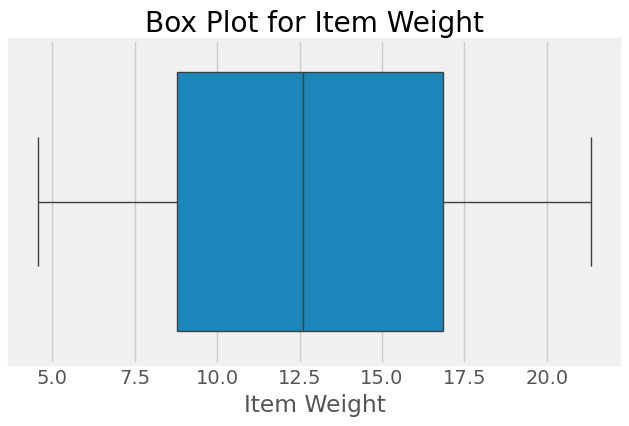

In [ ]:
plt.figure(figsize=(7,4))
plt.style.use('fivethirtyeight')

sns.boxplot(x=train['Item_Weight'], data=train)

plt.xlabel('Item Weight')
plt.title('Box Plot for Item Weight')
plt.show()

*The Box Plots above clearly show no "Outliers" and hence we can impute the missing values with "Mean" values.*

In [ ]:
train['Item_Weight']= train['Item_Weight'].fillna(train['Item_Weight'].mean())

In [ ]:
train['Item_Weight'].isnull().sum()

0

2) Outlet Size

In [ ]:
train['Outlet_Size'].isnull().sum()

2410

In [ ]:
train['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


*Since the outlet_size is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column.*

In [ ]:
train['Outlet_Size']= train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [ ]:
train['Outlet_Size'].isnull().sum()

0

In [ ]:
# Checking for any null value in dataframe

train.isnull().values.any()

False

**Checking categorical columns for any discrepancy**

In [ ]:
train['Item_Identifier'].value_counts()

,count
Item_Identifier,
FDW13,10
FDG33,10
NCY18,9
FDD38,9
DRE49,9
...,...
FDY43,1
FDQ60,1
FDO33,1


In [ ]:
train['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


*We find some irregularities in this column*

In [ ]:
train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace=True)
train['Item_Fat_Content']= train['Item_Fat_Content'].astype(str)

In [ ]:
train['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


In [ ]:
train['Outlet_Identifier'].value_counts()

,count
Outlet_Identifier,
OUT027,935
OUT013,932
OUT049,930
OUT046,930
OUT035,930
OUT045,929
OUT018,928
OUT017,926
OUT010,555


In [ ]:
train['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,5203
Small,2388
High,932


In [ ]:
train['Outlet_Location_Type'].value_counts()

,count
Outlet_Location_Type,
Tier 3,3350
Tier 2,2785
Tier 1,2388


In [ ]:
train['Outlet_Type'].value_counts()

,count
Outlet_Type,
Supermarket Type1,5577
Grocery Store,1083
Supermarket Type3,935
Supermarket Type2,928


- *We will convert "Outlet_Establishment_Year" to get the age of store to get more meaningful information and delete the "Outlet_Establishment_Year" column*

In [ ]:
train['Years_Established'] = train['Outlet_Establishment_Year'].apply(lambda x: 2024 - x)
del train['Outlet_Establishment_Year']

## **3) Exploratory Data Analysis and Visual Insights**

In [ ]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Years_Established'],
      dtype='object')

In [ ]:
train.sample(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
1091,FDV22,14.85,Regular,0.009931,Snack Foods,157.4630,OUT013,High,Tier 3,Supermarket Type1,2503.4080,37
3641,FDX11,16.00,Regular,0.106732,Baking Goods,183.6634,OUT035,Small,Tier 2,Supermarket Type1,2544.6876,20


### **3.1 Univariate Analysis**

**3.1.1 Target Variable - Item Outlet Sales**

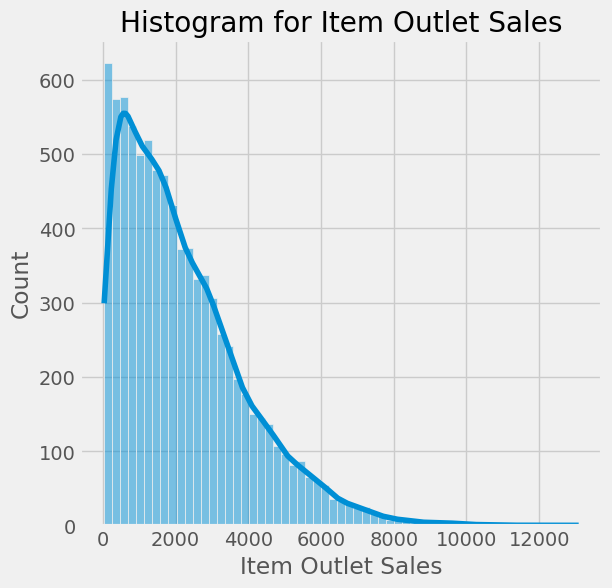

In [ ]:
plt.figure(figsize=(6,6))
plt.style.use('fivethirtyeight')

sns.histplot(train['Item_Outlet_Sales'], kde=True)

plt.xlabel('Item Outlet Sales')
plt.title('Histogram for Item Outlet Sales')
plt.show()

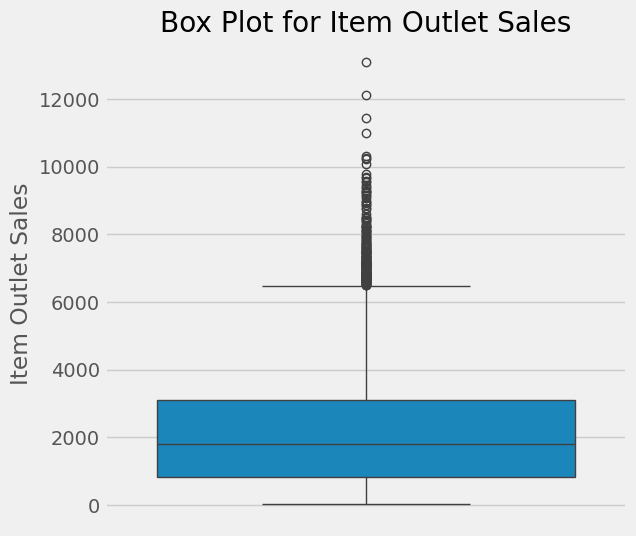

In [ ]:
plt.figure(figsize=(6,6))
plt.style.use('fivethirtyeight')

sns.boxplot(train['Item_Outlet_Sales'])

plt.ylabel('Item Outlet Sales')
plt.title('Box Plot for Item Outlet Sales')
plt.show()

**3.1.2 Independent Variables (Numerical Features)**

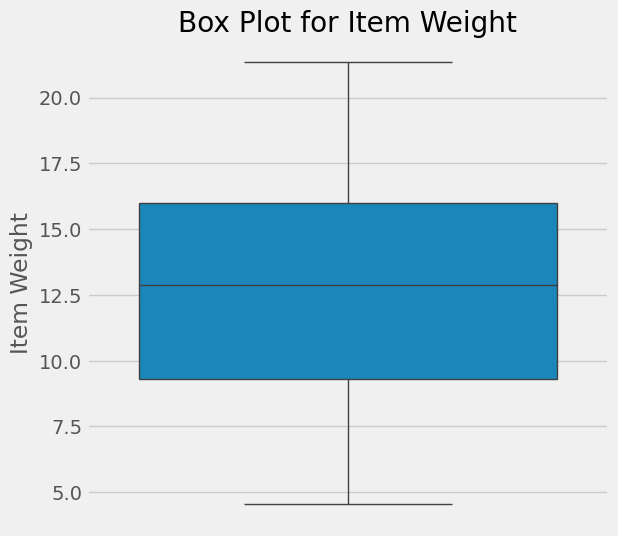

In [ ]:
plt.figure(figsize=(6,6))
plt.style.use('fivethirtyeight')

sns.boxplot(data=train, y='Item_Weight')

plt.ylabel('Item Weight')
plt.title('Box Plot for Item Weight')
plt.show()

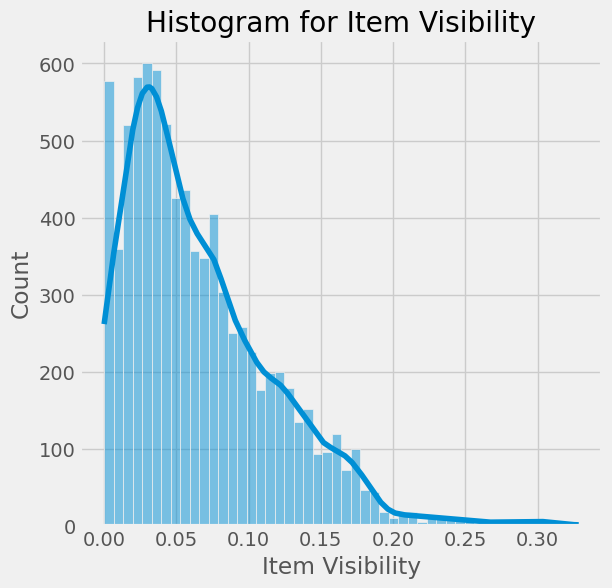

In [ ]:
plt.figure(figsize=(6,6))
plt.style.use('fivethirtyeight')

sns.histplot(data=train, x='Item_Visibility', kde=True)

plt.xlabel('Item Visibility')
plt.title('Histogram for Item Visibility')
plt.show()

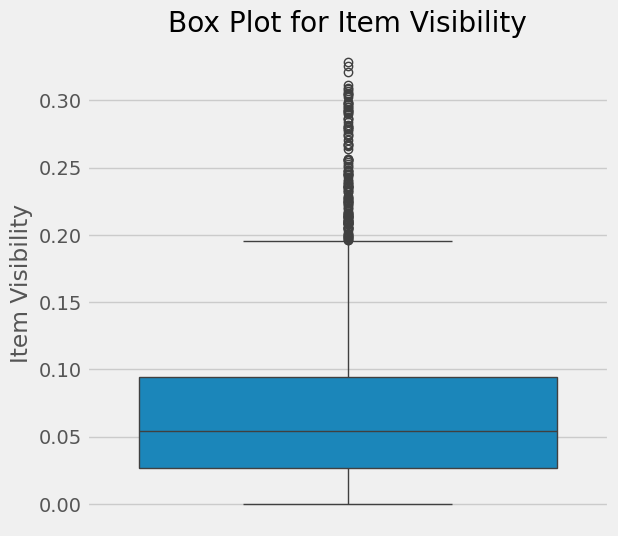

In [ ]:
plt.figure(figsize=(6,6))
plt.style.use('fivethirtyeight')

sns.boxplot(data=train, y='Item_Visibility')

plt.ylabel('Item Visibility')
plt.title('Box Plot for Item Visibility')
plt.show()

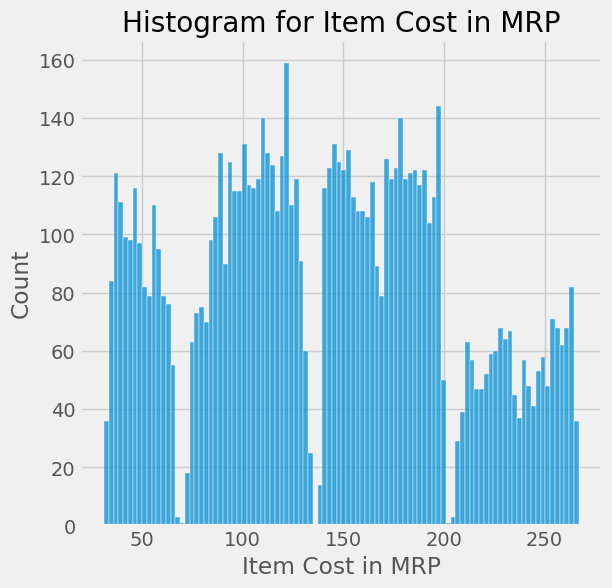

In [ ]:
plt.figure(figsize=(6,6))
plt.style.use('fivethirtyeight')

sns.histplot(data=train, x='Item_MRP', kde=False, bins=100)

plt.xlabel('Item Cost in MRP')
plt.title('Histogram for Item Cost in MRP')
plt.show()

**3.1.3 Independent Variables (Categorical Features)**

<Figure size 600x600 with 0 Axes>

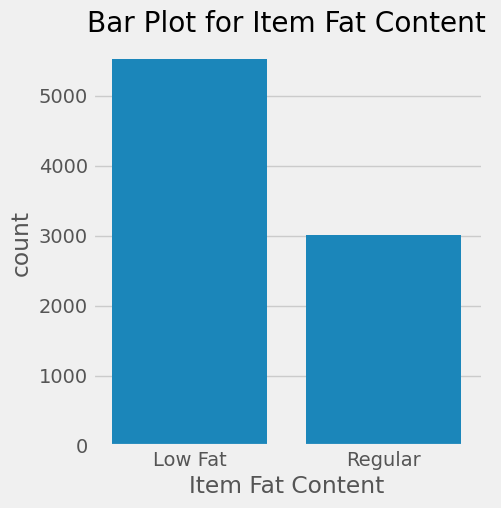

In [ ]:
plt.figure(figsize=(6,6))
plt.style.use('fivethirtyeight')

sns.catplot(x="Item_Fat_Content", kind="count", data=train)

plt.xlabel('Item Fat Content')
plt.title('Bar Plot for Item Fat Content')
plt.show()

<Figure size 600x600 with 0 Axes>

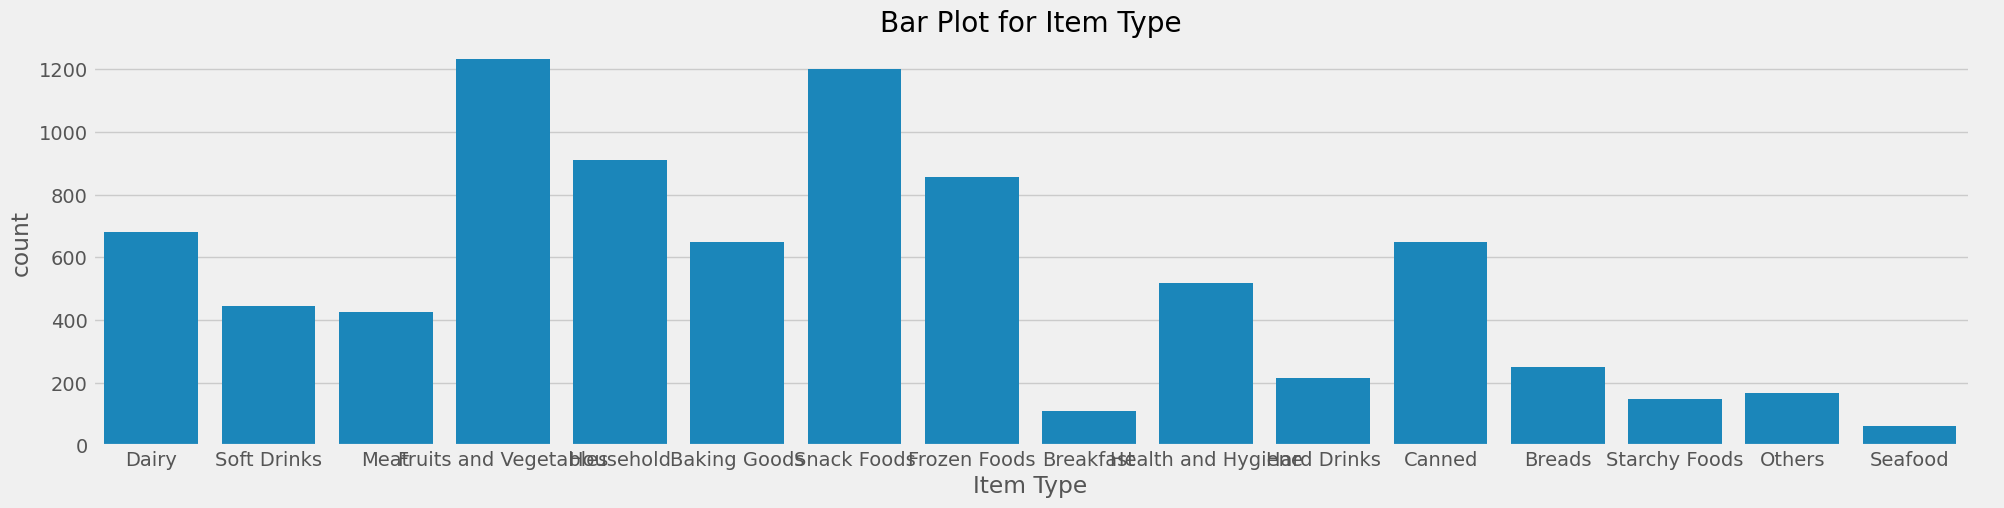

In [ ]:
plt.figure(figsize=(6,6))

sns.catplot(x='Item_Type', kind='count', data=train, aspect=4)

plt.xlabel('Item Type')
plt.title('Bar Plot for Item Type')
plt.show()

<Figure size 600x600 with 0 Axes>

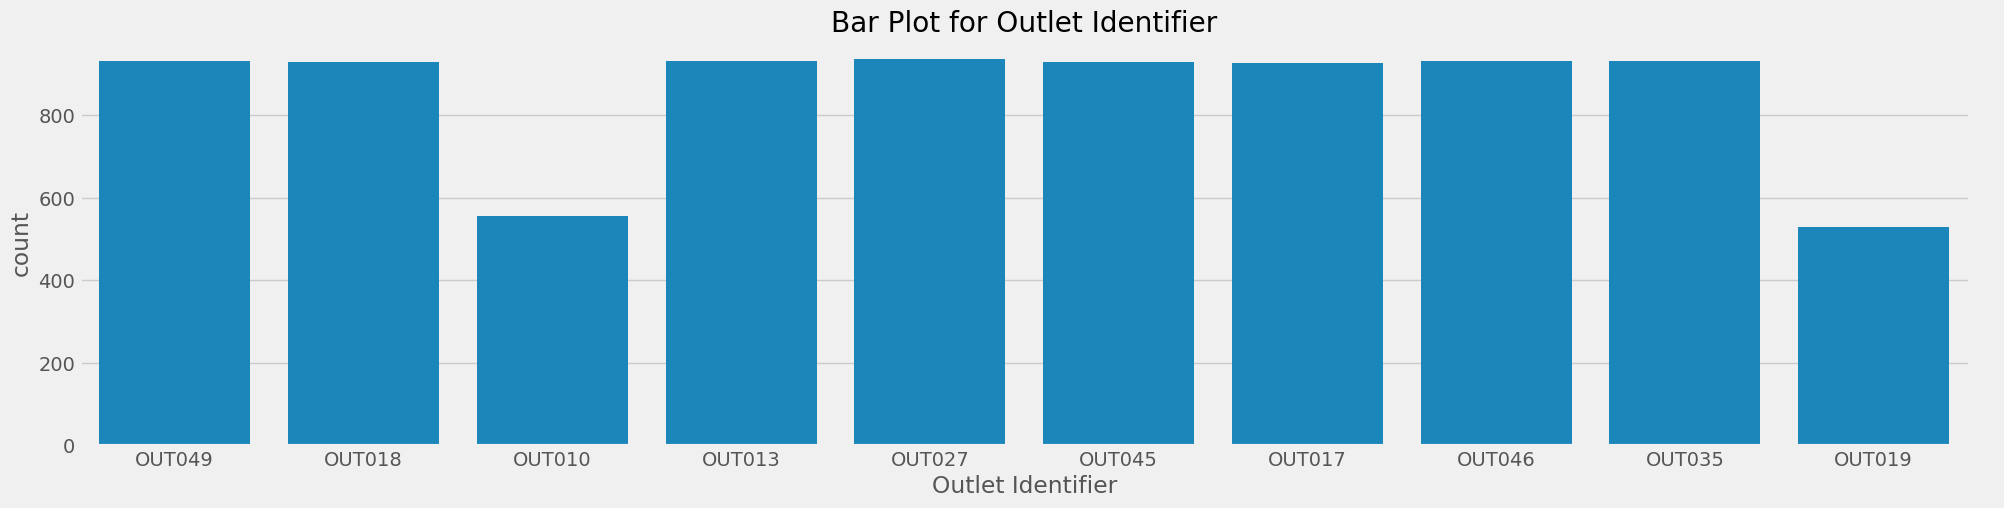

In [ ]:
plt.figure(figsize=(6,6))
plt.style.use("fivethirtyeight")
sns.catplot(x='Outlet_Identifier', kind='count', data=train, aspect=4)

plt.xlabel('Outlet Identifier')
plt.title('Bar Plot for Outlet Identifier')
plt.show()

<Figure size 600x600 with 0 Axes>

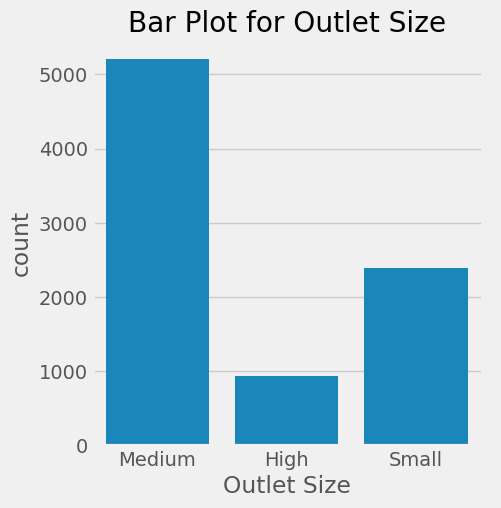

In [ ]:
plt.figure(figsize=(6,6))
plt.style.use('fivethirtyeight')

sns.catplot(x='Outlet_Size', kind='count', data=train)

plt.xlabel('Outlet Size')
plt.title('Bar Plot for Outlet Size')
plt.show()

<Figure size 600x600 with 0 Axes>

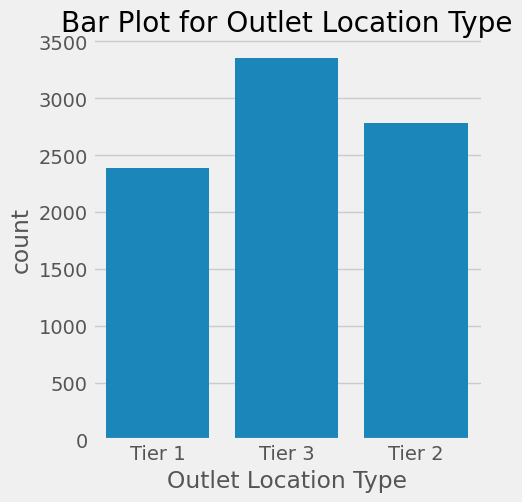

In [ ]:
plt.figure(figsize=(6,6))
plt.style.use('fivethirtyeight')

sns.catplot(x='Outlet_Location_Type', data=train, kind='count')

plt.xlabel('Outlet Location Type')
plt.title('Bar Plot for Outlet Location Type')
plt.show()

<Figure size 600x600 with 0 Axes>

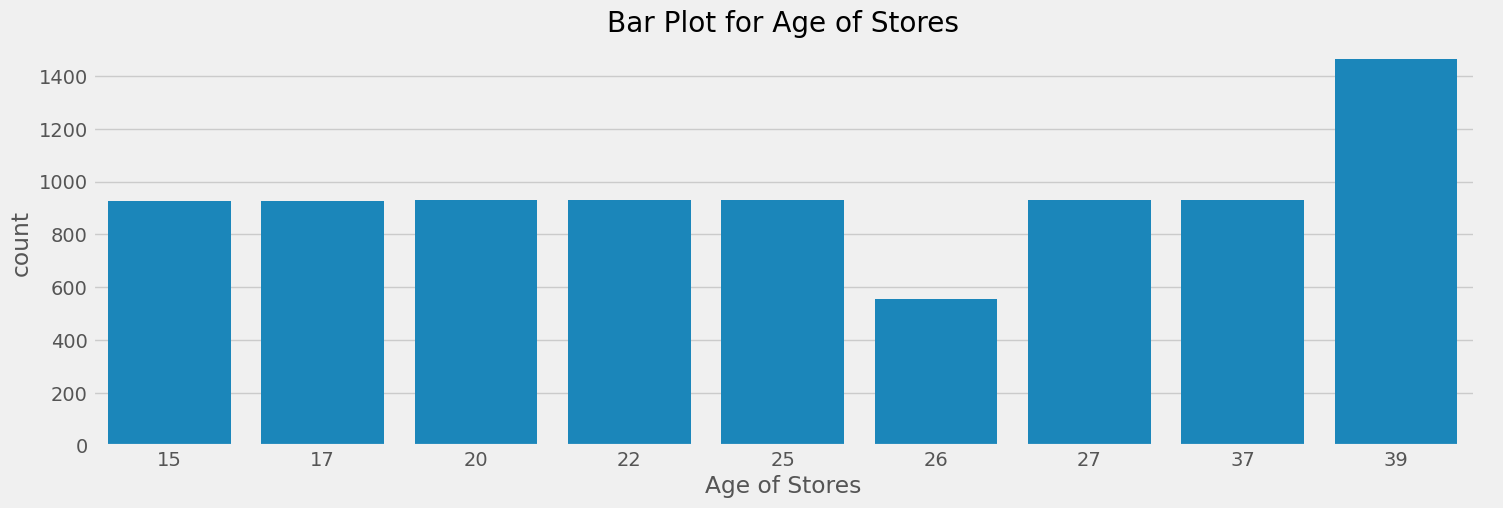

In [ ]:
plt.figure(figsize=(6,6))

sns.catplot(x='Years_Established', kind='count', data=train, aspect=3)

plt.xlabel('Age of Stores')
plt.title('Bar Plot for Age of Stores')
plt.show()

<Figure size 600x600 with 0 Axes>

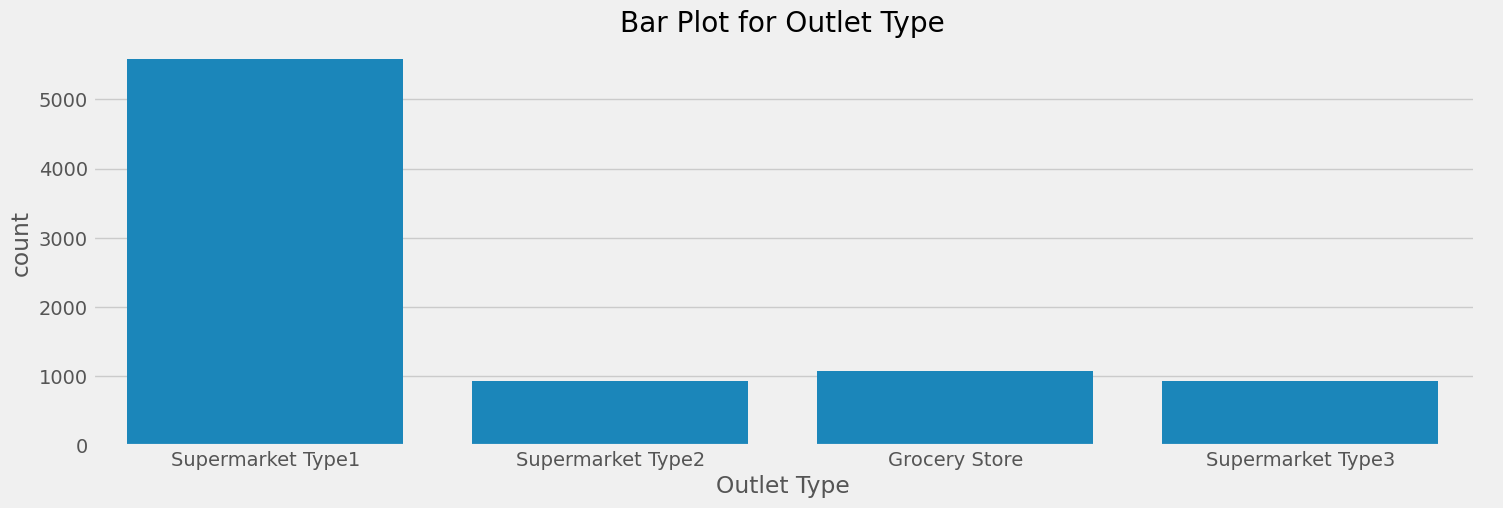

In [ ]:
plt.figure(figsize=(6,6))
plt.style.use('fivethirtyeight')

sns.catplot(x='Outlet_Type', kind='count', data=train, aspect=3)

plt.xlabel('Outlet Type')
plt.title('Bar Plot for Outlet Type')
plt.show()

### **3.2 Bivariate Analysis**

*Item Weight vs Item Outlet Sales*

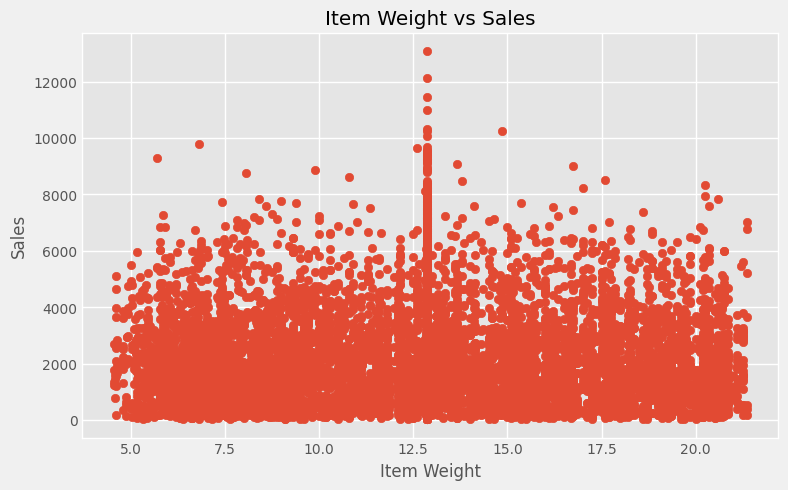

In [ ]:
plt.figure(figsize=(8,5))
plt.style.use('ggplot')

plt.scatter(x='Item_Weight', y='Item_Outlet_Sales', data=train)

plt.xlabel('Item Weight')
plt.ylabel('Sales')
plt.title('Item Weight vs Sales')
plt.show()

*Item Visibility vs Item Outlet Sales*

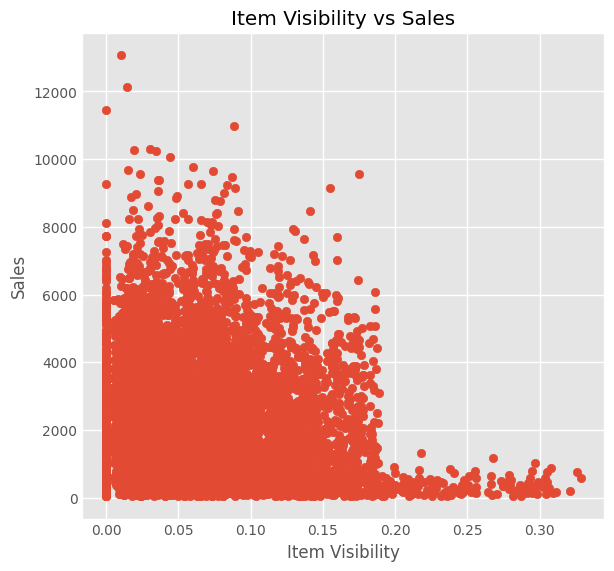

In [ ]:
plt.figure(figsize=(6,6))
plt.style.use('fast')

plt.scatter(x='Item_Visibility', y='Item_Outlet_Sales', data=train)

plt.xlabel('Item Visibility')
plt.ylabel('Sales')
plt.title('Item Visibility vs Sales')
plt.show()

**Observations:**
- Item_Visibility has a minimum value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

*Lets consider it like missing information and impute it with mean visibility of that product.*

In [ ]:
train['Item_Visibility']=train['Item_Visibility'].replace(0,train['Item_Visibility'].mean())

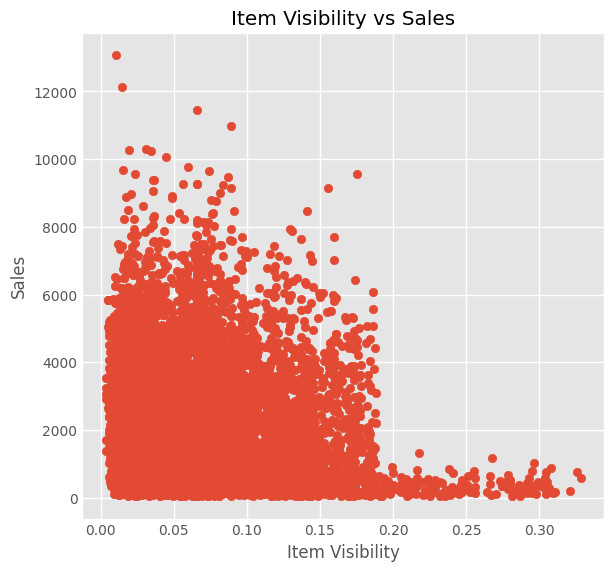

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(x='Item_Visibility', y='Item_Outlet_Sales', data=train)

plt.xlabel('Item Visibility')
plt.ylabel('Sales')
plt.title('Item Visibility vs Sales')
plt.show()

*We can see that now visibility is not exactly zero and it has some value indicating that Item is rarely purchased by the customers.*

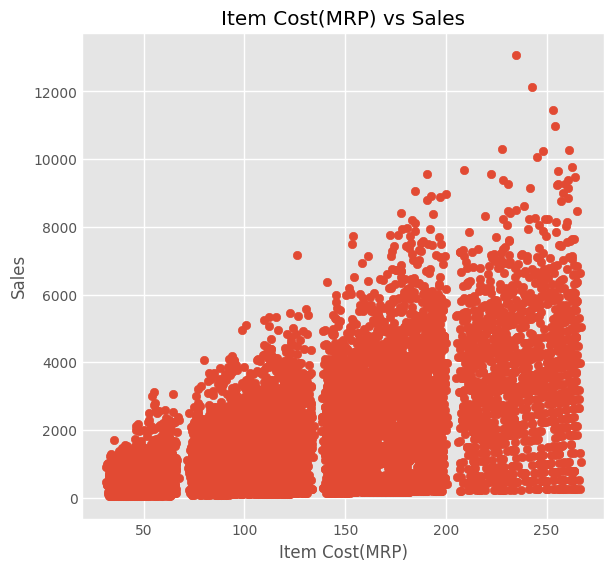

In [ ]:
plt.figure(figsize=(6,6))
plt.style.use("ggplot")

plt.scatter(x='Item_MRP', y='Item_Outlet_Sales', data=train)

plt.xlabel('Item Cost(MRP)')
plt.ylabel('Sales')
plt.title('Item Cost(MRP) vs Sales')
plt.show()

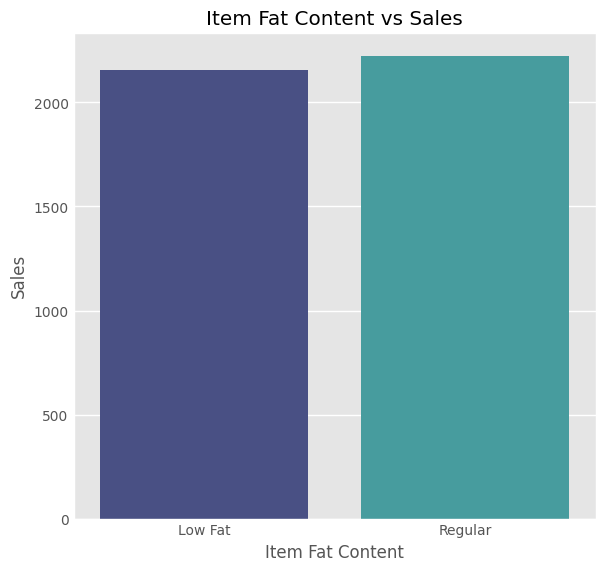

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=train, palette='mako',errorbar=None)

plt.xlabel('Item Fat Content')
plt.ylabel('Sales')
plt.title('Item Fat Content vs Sales')
plt.show()

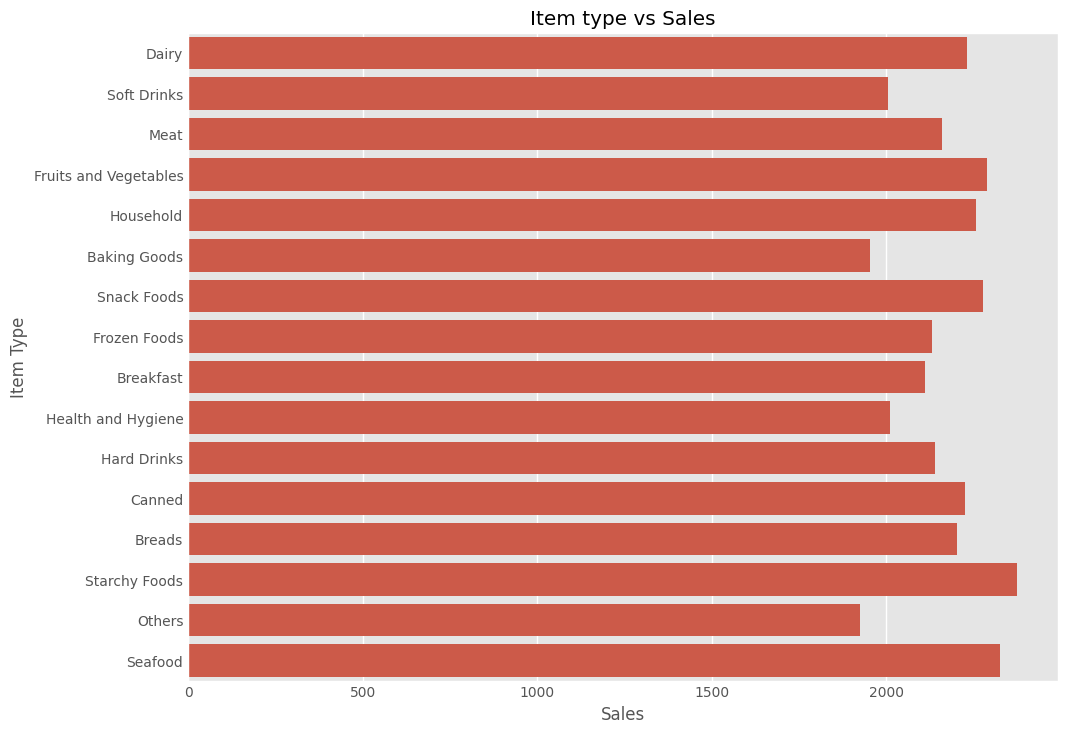

In [ ]:
plt.figure(figsize=(10,8))
plt.style.use('ggplot')
sns.barplot(y='Item_Type', x='Item_Outlet_Sales', data=train, errorbar=None)

plt.xlabel('Sales')
plt.ylabel('Item Type')
plt.title('Item type vs Sales')
plt.show()

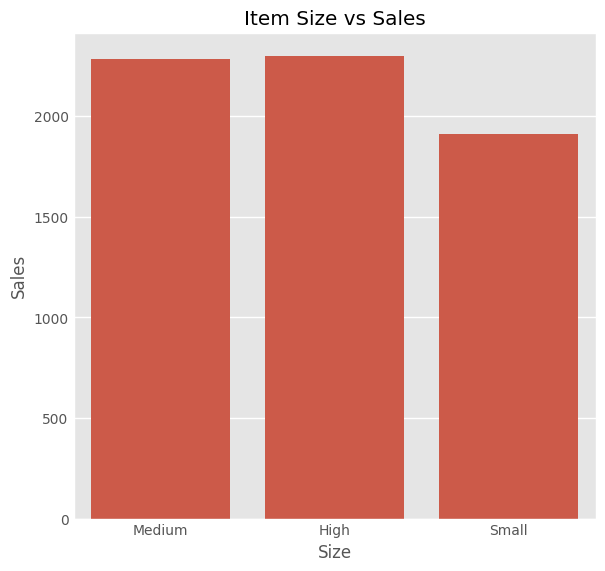

In [ ]:
plt.figure(figsize=(6,6))
plt.style.use('fast')
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=train, errorbar=None)

plt.xlabel('Size')
plt.ylabel('Sales')
plt.title('Item Size vs Sales')
plt.show()

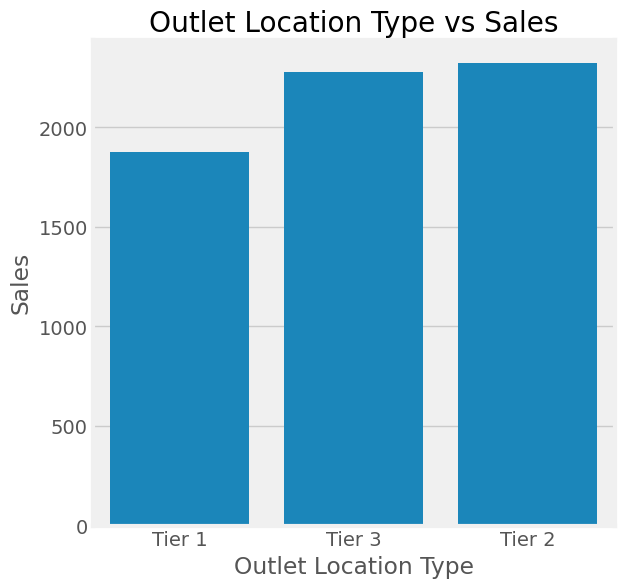

In [ ]:
plt.figure(figsize=(6,6))
plt.style.use('fivethirtyeight')
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=train, errorbar=None)

plt.xlabel('Outlet Location Type')
plt.ylabel('Sales')
plt.title('Outlet Location Type vs Sales')
plt.show()

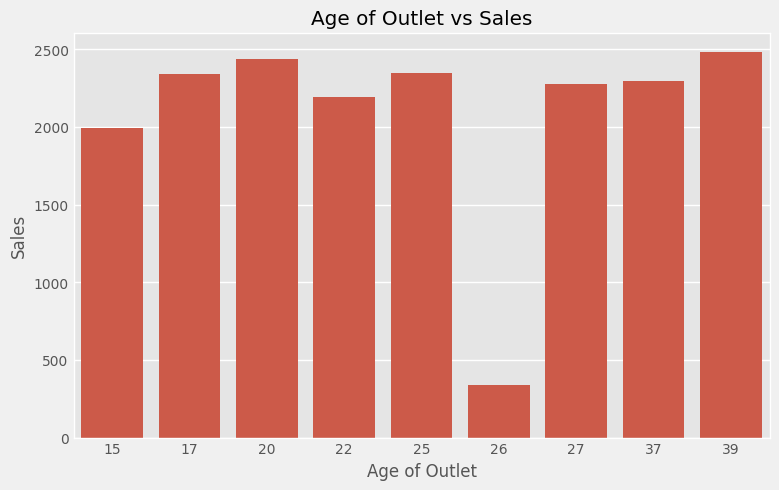

In [ ]:
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
sns.barplot(x='Years_Established', y='Item_Outlet_Sales', data=train, errorbar=None)

plt.xlabel('Age of Outlet')
plt.ylabel('Sales')
plt.title('Age of Outlet vs Sales')
plt.show()

### **3.3 Multivariate Analysis**

Item Type by Item Fat Content to Item Outlet Sales

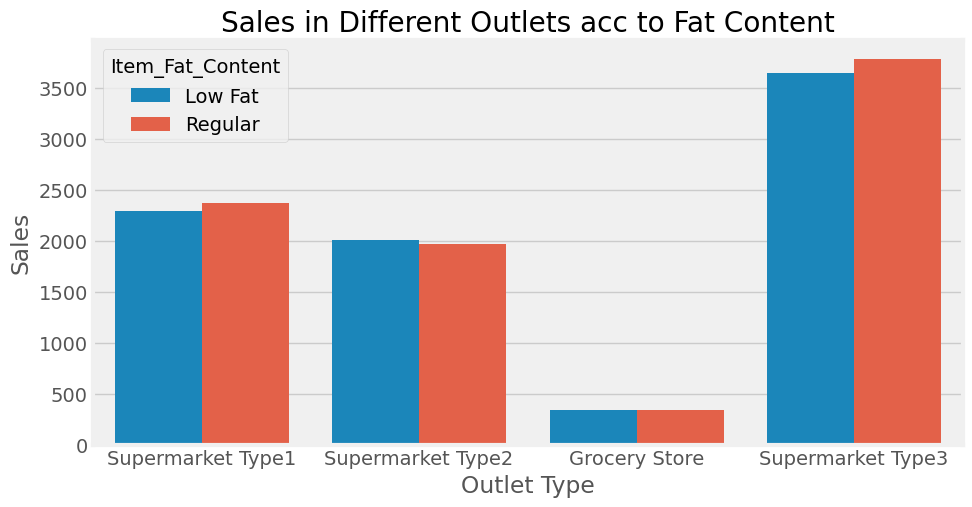

In [ ]:
plt.figure(figsize=(10,5))
plt.style.use('fivethirtyeight')
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', hue='Item_Fat_Content', data=train, errorbar=None)

plt.xlabel('Outlet Type')
plt.ylabel('Sales')
plt.title('Sales in Different Outlets acc to Fat Content')
plt.show()

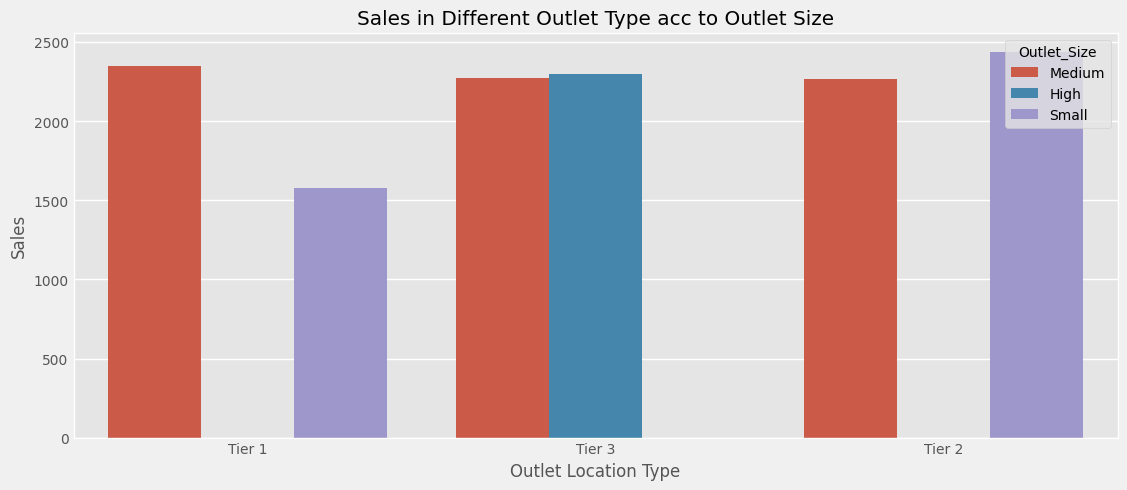

In [ ]:
plt.figure(figsize=(12,5))
plt.style.use('ggplot')
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Size', data=train, errorbar=None)

plt.xlabel('Outlet Location Type')
plt.ylabel('Sales')
plt.title('Sales in Different Outlet Type acc to Outlet Size')
plt.show()

**Observations:**
- Sales accross Outlet Type is even for both the categories of Fat Content
- Tier 1 and Tier 2 dont have High Size outlets, we can boost the sales by increasing the no of High size outlets in these loctaions, esp Tier 2 as the sales are more in Tier 2 than Tier 1

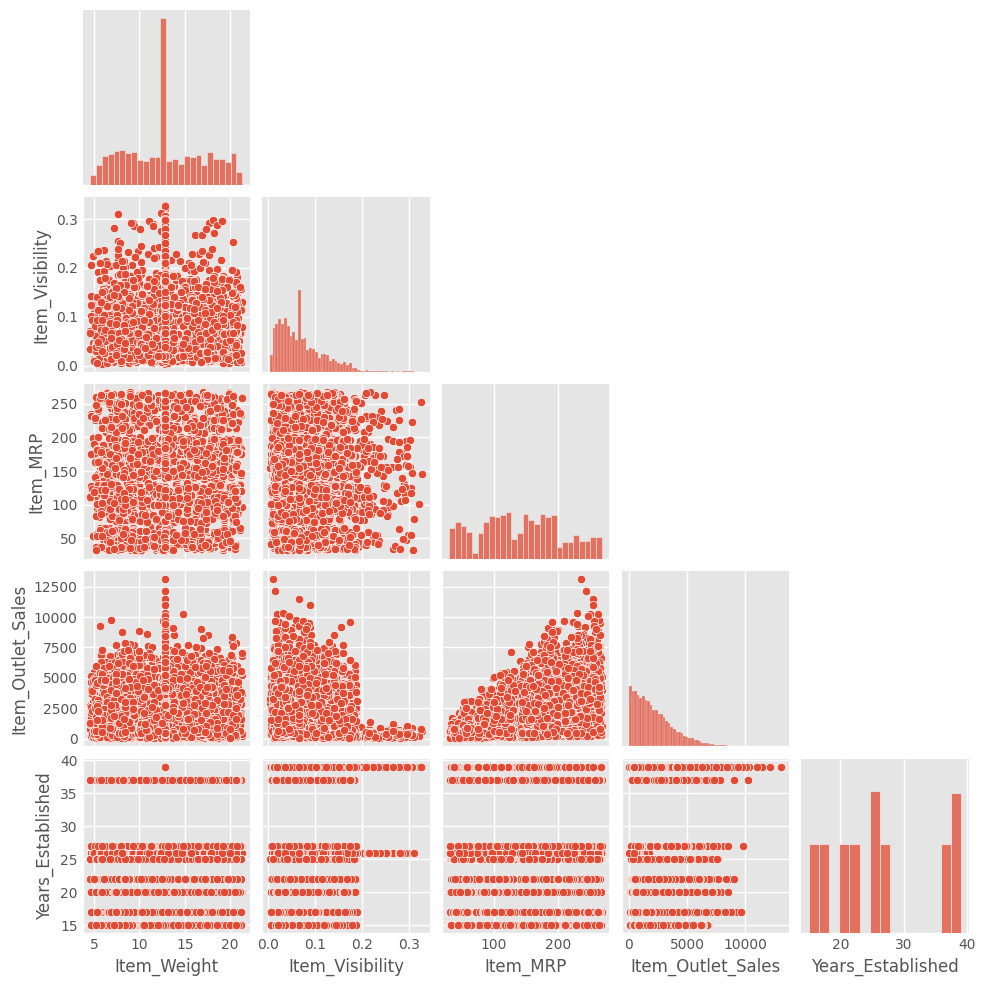

In [ ]:
sns.pairplot(train, height=2,corner=True)
plt.show()

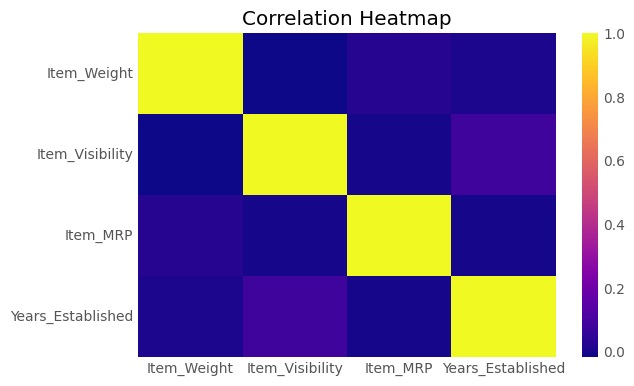

In [ ]:
df_htmp = train.drop(columns=['Item_Outlet_Sales']).corr(numeric_only=True)
plt.figure(figsize=(6, 4))
sns.heatmap(df_htmp, cmap='plasma')
plt.title('Correlation Heatmap')
plt.show()

## **4) Feature Engineering**

In [ ]:
train.sample(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
1809,NCR54,16.350,Low Fat,0.066132,Household,198.2110,OUT035,Small,Tier 2,Supermarket Type1,2946.1650,20
895,FDB15,10.895,Low Fat,0.136811,Dairy,263.0568,OUT046,Small,Tier 1,Supermarket Type1,527.3136,27


<Axes: xlabel='Outlet_Size', ylabel='count'>

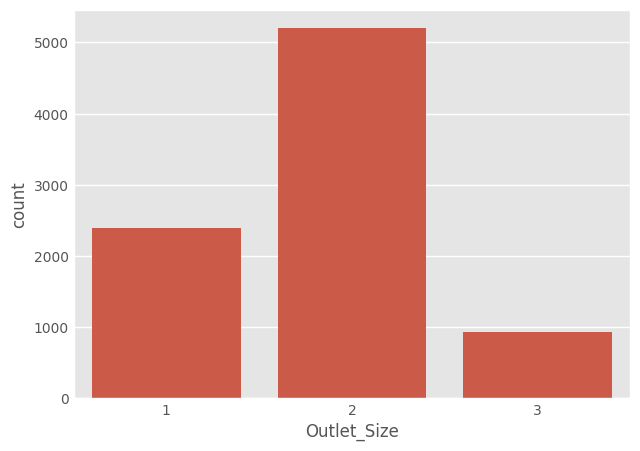

In [ ]:
# Encoding the Outlet Size
train['Outlet_Size'] = train['Outlet_Size'].map({'Small'  : 1,
                                                 'Medium' : 2,
                                                 'High'   : 3
                                                 }).astype(int)
sns.countplot(x=train['Outlet_Size'])

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

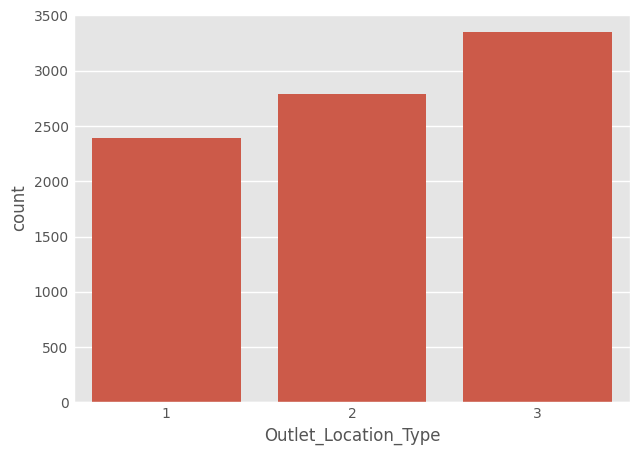

In [ ]:
# Getting the last character of Outlet Location Type to encode it
train['Outlet_Location_Type'] = train['Outlet_Location_Type'].str[-1:].astype(int)
sns.countplot(x=train['Outlet_Location_Type'])

In 'Item_Identifier_Categories', it has first two characters defining the item type, these are:
- FD for probably Food;
- DR for probably Drinks;
- NC for probably Non-Consumables.

So we'll drop the Item_Identifier feature and create a new column containing these categories.

<Axes: xlabel='Item_Identifier_Categories', ylabel='count'>

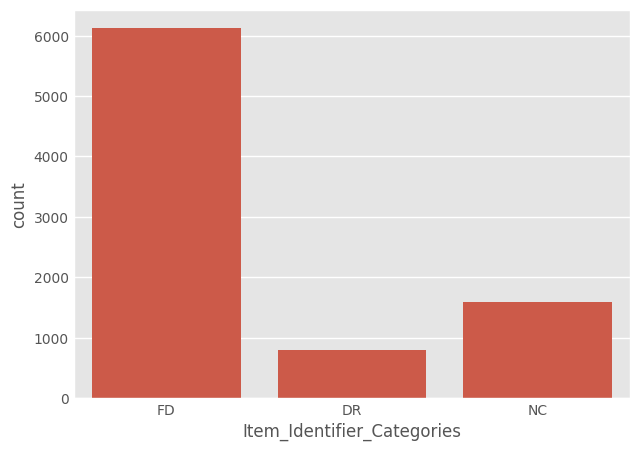

In [ ]:
train['Item_Identifier_Categories'] = train['Item_Identifier'].str[0:2]
sns.countplot(x=train['Item_Identifier_Categories'])

In [ ]:
train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established,Item_Identifier_Categories
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,2,1,Supermarket Type1,3735.1380,25,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2,3,Supermarket Type2,443.4228,15,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,2,1,Supermarket Type1,2097.2700,25,FD


In [ ]:
# Label Encoder for Ordinal Data

le = LabelEncoder()
odl_ftr = ['Item_Fat_Content', 'Outlet_Type', 'Outlet_Location_Type']

for feature in odl_ftr:
    train[feature] = le.fit_transform(train[feature])

In [ ]:
train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established,Item_Identifier_Categories
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,2,0,1,3735.1380,25,FD
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2,2,2,443.4228,15,DR
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,2,0,1,2097.2700,25,FD


In [ ]:
# One Hot Encoding for some features

train = pd.get_dummies(train, columns=['Item_Type', 'Item_Identifier_Categories', 'Outlet_Identifier'], drop_first=True, dtype=int)

In [ ]:
train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established,...,Item_Identifier_Categories_NC,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,FDA15,9.30,0,0.016047,249.8092,2,0,1,3735.1380,25,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,1,0.019278,48.2692,2,2,2,443.4228,15,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0,0.016760,141.6180,2,0,1,2097.2700,25,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Let's drop useless columns
train.drop(labels=['Item_Identifier'], axis=1, inplace=True)

In [ ]:
train.head(3)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established,Item_Type_Breads,...,Item_Identifier_Categories_NC,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.30,0,0.016047,249.8092,2,0,1,3735.1380,25,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,1,0.019278,48.2692,2,2,2,443.4228,15,0,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0,0.016760,141.6180,2,0,1,2097.2700,25,0,...,0,0,0,0,0,0,0,0,0,1


## **5) Model Building**

In [ ]:
# Feature Matrix and Traget Variable

X = train.drop('Item_Outlet_Sales', axis=1)
y = train['Item_Outlet_Sales']

In [ ]:
# Spliting of Dataset into Training and Testing Dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### **5.1 Multiple Linear Regressor**

In [ ]:
# model
regressor_mlr = LinearRegression()

#fit
regressor_mlr.fit(X_train, y_train)

#predict
y_pred = regressor_mlr.predict(X_test)

#score variables
MLR_MAE = round(MAE(y_test, y_pred),4)
MLR_MSE = round(MSE(y_test, y_pred),4)
MLR_R_2 = round(R2(y_test, y_pred),4)

print(f" Mean Absolute Error: {MLR_MAE}")
print(f" Mean Squared Error: {MLR_MSE}")
print(f" R^2 Score: {MLR_R_2}")

 Mean Absolute Error: 875.5457
 Mean Squared Error: 1406218.7903
 R^2 Score: 0.5445


In [ ]:
print('Training score  : {}'.format(regressor_mlr.score(X_train, y_train)))
print('Test score      : {}'.format(regressor_mlr.score(X_test, y_test)))

Training score  : 0.5682520285477031
Test score      : 0.5444817757358973


### **5.2 Ridge Regressor**

In [ ]:
#model
regressor_rd = Ridge()

#fit
regressor_rd.fit(X_train,y_train)

#predict
y_pred = regressor_rd.predict(X_test)

#score variables
RD_MAE = round(MAE(y_test, y_pred),2)
RD_MSE = round(MSE(y_test, y_pred),2)
RD_R_2 = round(R2(y_test, y_pred),4)

print(f" Mean Absolute Error: {RD_MAE}")
print(f" Mean Squared Error: {RD_MSE}")
print(f" R^2 Score: {RD_R_2}")

 Mean Absolute Error: 875.53
 Mean Squared Error: 1406192.79
 R^2 Score: 0.5445


In [ ]:
print('Training score  : {}'.format(regressor_rd.score(X_train, y_train)))
print('Test score      : {}'.format(regressor_rd.score(X_test, y_test)))

Training score  : 0.5682515814971845
Test score      : 0.5444901964535775


### **5.3 Lasso Regressor**

In [ ]:
#model
regressor_ls = Lasso(alpha = 1.5, max_iter=1000)
#fit
regressor_ls.fit(X_train,y_train)

#predict
y_pred = regressor_ls.predict(X_test)

#score variables
LS_MAE = round(MAE(y_test, y_pred),2)
LS_MSE = round(MSE(y_test, y_pred),2)
LS_R_2 = round(R2(y_test, y_pred),4)

print(f" Mean Absolute Error: {LS_MAE}")
print(f" Mean Squared Error: {LS_MSE}")
print(f" R^2 Score: {LS_R_2}")

 Mean Absolute Error: 874.22
 Mean Squared Error: 1403555.06
 R^2 Score: 0.5453


In [ ]:
print('Training score  : {}'.format(regressor_ls.score(X_train, y_train)))
print('Test score      : {}'.format(regressor_ls.score(X_test, y_test)))

Training score  : 0.5679126230438603
Test score      : 0.5453446403594501


### **5.4 Elastic Net Regressor**

In [ ]:
#model
regressor_eln = ElasticNet(alpha=0.05)
#fit
regressor_eln.fit(X_train,y_train)

#predict
y_pred = regressor_eln.predict(X_test)

#score variables
ELN_MAE = round(MAE(y_test, y_pred),2)
ELN_MSE = round(MSE(y_test, y_pred),2)
ELN_R_2 = round(R2(y_test, y_pred),4)

print(f" Mean Absolute Error: {ELN_MAE}")
print(f" Mean Squared Error: {ELN_MSE}")
print(f" R^2 Score: {ELN_R_2}")

 Mean Absolute Error: 878.23
 Mean Squared Error: 1422358.06
 R^2 Score: 0.5393


In [ ]:
print('Training score  : {}'.format(regressor_eln.score(X_train, y_train)))
print('Test score      : {}'.format(regressor_eln.score(X_test, y_test)))

Training score  : 0.5638006108789602
Test score      : 0.5392537633782104


## **6) Conclusion**

In [ ]:
MAE= [MLR_MAE,RD_MAE,LS_MAE,ELN_MAE]
MSE= [MLR_MSE,RD_MSE,LS_MSE,ELN_MSE]
R_2= [MLR_R_2,RD_R_2,LS_R_2,ELN_R_2]

Models = pd.DataFrame({
    'Models': ["Multiple Linear Regression","Ridge Regressor","Lasso Regressor","Elastic Net Regressor"],
    'MAE': MAE, 'MSE': MSE, 'R^2':R_2})
Models.sort_values(by='R^2', ascending=True)

,Models,MAE,MSE,R^2
3,Elastic Net Regressor,878.2300,1.422358e+06,0.5393
0,Multiple Linear Regression,875.5457,1.406219e+06,0.5445
1,Ridge Regressor,875.5300,1.406193e+06,0.5445
2,Lasso Regressor,874.2200,1.403555e+06,0.5453


**Thus Lasso Regressor is best fit for this dataset with highest R2 Score and minimum Mean Squared Error(MSE) & minimum Mean Absoulute Error(MAE)**

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 829.0325146662757
Mean Squared Error (MSE): 1412650.6278739793
R² Score: 0.5423983024818988


**HYPER-PARAMETER TUNING**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the parameter distribution for RandomizedSearch
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Use RandomizedSearchCV to search for the best parameters
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=20, cv=5, scoring='neg_mean_squared_error',
                                   random_state=42, n_jobs=-1, verbose=2)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the model with the best parameters
best_rf_model = random_search.best_estimator_

# Make predictions and evaluate
y_pred = best_rf_model.predict(X_test)

# Calculate and print the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Improved MAE: {mae}")
print(f"Improved MSE: {mse}")
print(f"Improved R² Score: {r2}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 40}
Improved MAE: 819.5426333493563
Improved MSE: 1335543.924093107
Improved R² Score: 0.5673755741752224
